## 

# Tuning Curves Playground Notebook

In [3]:

## Import Libraries:
# Mathematical / Numerical Libraries:
import numpy as np

# Plotting:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib inline  # use %matplotlib tk to get a popout window, requires PyQt5

# Type hinting:
from typing import List, Union, Tuple


## 1-D Gaussian Tuning Function

In [4]:
def gaussian(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    """Creates a simple 1 dimensional Gaussian probability distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate the distribution at
        mu (float): The mean (centre point) of the distribution
        sigma (float): The stdev of the gaussian distribution

    Returns:
        np.ndarray: A numpy array representing the gaussian distribution evaluated at the input points x
    """
    return (np.exp(-((x - mu)**2) / (2 * sigma**2))) / (np.sqrt(2 *  np.pi) * sigma)


def gaussian_tuning_function(x: np.ndarray, mu: float, sigma: float, maxResponse: float=1, minResponse: float=0) -> np.ndarray:
    """Creates a shifted scaled Gaussian distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate at
        mu (float): The centre point of the distribution
        sigma (float): The stdev of the distribution
        maxResponse (float, optional): The maximum value of the response function. Defaults to 1.
        minResponse (float, optional): The minimum value of the response function. Defaults to 0.

    Returns:
        np.ndarray: A numpy array representing the gaussian distribution evaluated at the input points x
    """
    # compute gaussian PDF based on input:
    dist = gaussian(x, mu, sigma)
    
    # scale + shift to match min and max response range:
    dist = (dist/max(dist)) * (maxResponse - minResponse) + minResponse
    
    return dist


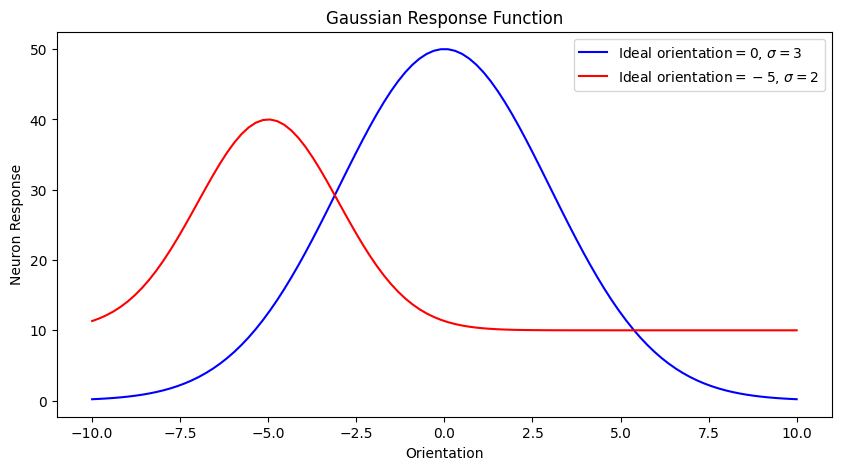

In [5]:
# Example for how this might represent the response of an individual neuron:
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 50
minResponse: int = 0
correctOrientation1: int = 0
stdev1: int = 3
response1: np.ndarray = gaussian_tuning_function(x, correctOrientation1, stdev1, maxResponse, minResponse)

maxResponse = 40
minResponse = 10
correctOrientation2 = -5
stdev2: int = 2
response2: np.ndarray = gaussian_tuning_function(x, correctOrientation2, stdev2, maxResponse, minResponse)


# plotting the output:
fig: plt.Figure = plt.figure(figsize=(10,5))
plt.plot(x, response1, '-', color="blue", label=fr"Ideal orientation$= {correctOrientation1}$, $\sigma={stdev1}$")
plt.plot(x, response2, '-', color="red", label=fr"Ideal orientation$= {correctOrientation2}$, $\sigma={stdev2}$")
plt.xlabel(r"Orientation")
plt.ylabel(r"Neuron Response")
plt.title(r"Gaussian Response Function")
plt.legend()
plt.show()

## Sigmoid Tuning Function

In [6]:
def sigmoid_tuning(x: np.ndarray, steepness: float, pivot: float, minResponse: float=0, maxResponse: float=1) -> np.ndarray:
    """Creates a shifted scaled Sigmoid distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate at
        steepness (float): The steepness of the step
        pivot (float): The pivot point (point at which the distribution is centred at)
        minResponse (float, optional): The minimum value of the response function. Defaults to 0.
        maxResponse (float, optional): The maximum value of the response function. Defaults to 1.

    Returns:
        np.ndarray: A numpy array representing the sigmoid distribution evaluated at the input points x
    """
    # create initial distribution:
    dist: np.ndarray =  1 / (1 + np.exp(-steepness * (x - pivot)))
    
    # scale + shift to match min and max response range:
    dist = (dist/max(dist)) * (maxResponse - minResponse) + minResponse
    
    return dist

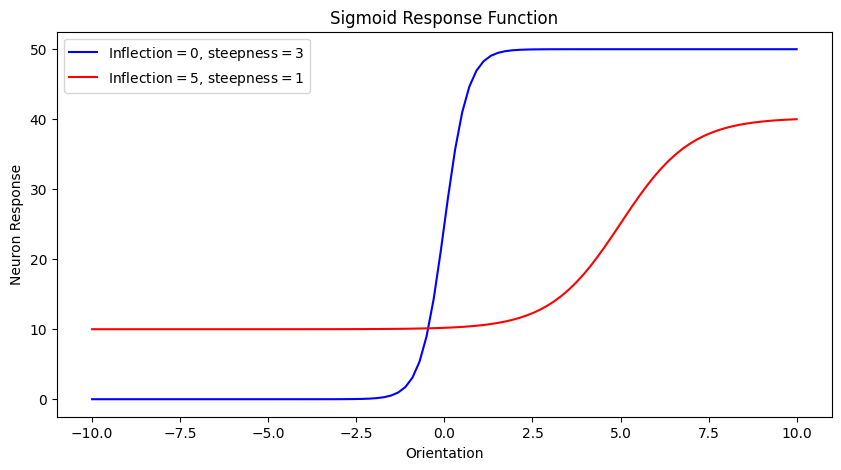

In [8]:
# Example for how this might represent the response of an individual neuron:
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 50
minResponse: int = 0
pivotPoint1: int = 0
steepness1: int = 3
response1: np.ndarray = sigmoid_tuning(x, steepness1, pivotPoint1, minResponse, maxResponse)

maxResponse: int = 40
minResponse: int = 10
pivotPoint2: int = 5
steepness2: int = 1
response2: np.ndarray = sigmoid_tuning(x, steepness2, pivotPoint2, minResponse, maxResponse)


# plotting the output:
fig: plt.Figure = plt.figure(figsize=(10,5))
plt.plot(x, response1, '-', color="blue", label=fr"Inflection$= {pivotPoint1}$, steepness$={steepness1}$")
plt.plot(x, response2, '-', color="red", label=fr"Inflection$= {pivotPoint2}$, steepness$={steepness2}$")
plt.xlabel(r"Orientation")
plt.ylabel(r"Neuron Response")
plt.title(r"Sigmoid Response Function")
plt.legend()
plt.show()

# Plotting Representational Dissimilarity Matrix

In [11]:
def compute_RDM(curves: List[np.ndarray]) -> np.ndarray:
    n: int = len(curves)
    
    rdm: np.ndarray = np.zeros((n,n))
    
    for i in range(n):
        for j in range(i+1, n):
            rdm[i,j] = rdm[j,i] = 1 - np.corrcoef(curves[i], curves[j])[0, 1] #! this dissimilarity metric might not be the ideal one to use in all scenarios
    return rdm

In [14]:
def plot_rdm(rdm: np.ndarray, labels: Union[List[str], None]=None, cmap: str='viridis') -> None:
    
    fig: plt.Figure = plt.figure(figsize=(10,5))
    
    plt.imshow(rdm, cmap=cmap)
    plt.colorbar(label='Dissimilarity')
    plt.title('RDM of Tuning Curves')
    
    if labels is not None:
        plt.xticks(range(len(labels)), labels, rotation=45, ha='left')
        plt.yticks(range(len(labels)), labels)
    plt.show()

In [7]:
# Generating multiple curves:
curves: List[np.ndarray] = []
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 50
minResponse: int = 0
correctOrientation: int = 0
stdev: int = 1
idealResponse: np.ndarray = gaussian_tuning_function(x, correctOrientation, stdev, maxResponse, minResponse)

for orientation in np.linspace(-5, 5, 50):
    curves.append(gaussian_tuning_function(x, orientation, stdev, maxResponse, minResponse))


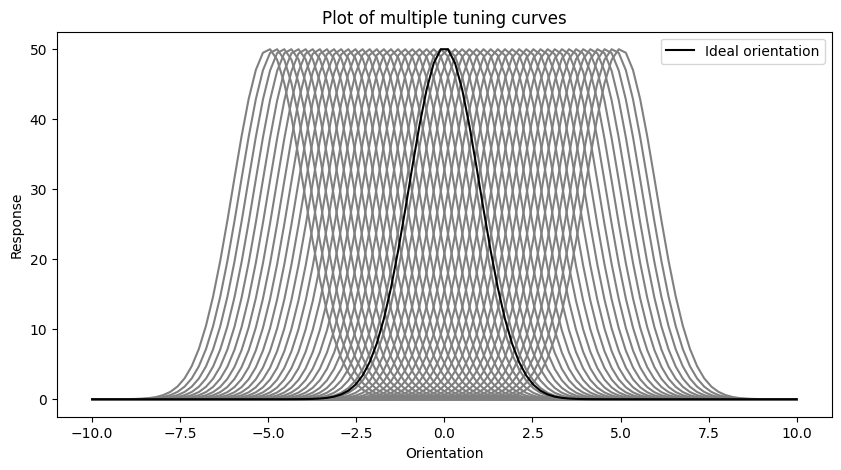

In [10]:
# Plot each of the curves:
fig: plt.Figure = plt.figure(figsize=(10,5))
for curve in curves:
    plt.plot(x, curve, '-', color="gray")
plt.plot(x, idealResponse, '-', color="black", label=r"Ideal orientation")
plt.xlabel(r"Orientation")
plt.ylabel(r"Response")
plt.title(r"Plot of multiple tuning curves")
plt.legend()
plt.show()

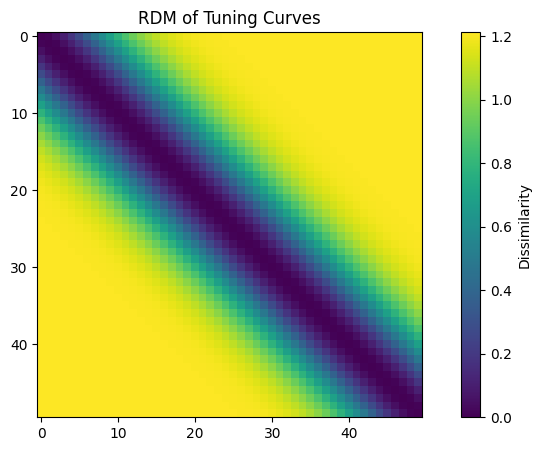

In [15]:
# Compute the RDM Matrix:
rdm = compute_RDM(curves)
plot_rdm(rdm)